In [67]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Datasets/twitter_validation.csv',names=['Id','Source','Target','Text'])
df

,Id,Source,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [68]:
df.isna().sum()

Id        0
Source    0
Target    0
Text      0
dtype: int64

In [69]:
df.drop(['Id','Source'],axis=1,inplace=True)
df

,Target,Text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
...,...,...
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [70]:
df['Target'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

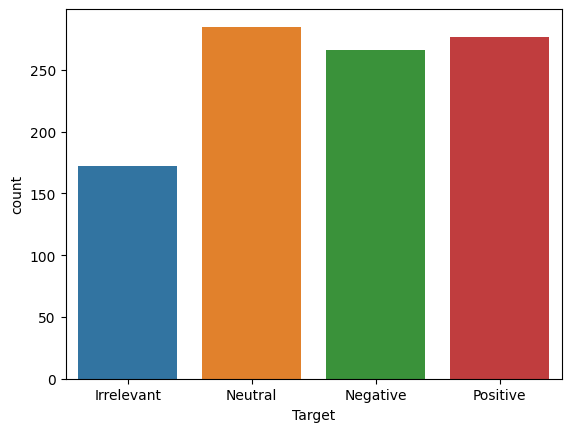

In [71]:
import seaborn as sns

sns.countplot(x='Target',data=df)


In [72]:
df1=df.loc[df['Target']!='Irrelevant']
df1


,Target,Text
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
993,Negative,Please explain how this is possible! How can t...
994,Positive,Good on Sony. As much as I want to see the new...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [73]:
df1['Target'].value_counts()

Neutral     285
Positive    277
Negative    266
Name: Target, dtype: int64

In [74]:
df1.reset_index(drop=True,inplace=True)
df1

,Target,Text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [75]:
#neutral 0, negative -1, positive 1

df1['Target']=df1['Target'].map({'Neutral':0,'Negative':-1,'Positive':1})
df1

<ipython-input-75-ca5ba8ff98d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Target']=df1['Target'].map({'Neutral':0,'Negative':-1,'Positive':1})


,Target,Text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.


In [76]:
text=df1.Text
text

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

In [77]:
#Remove special characters
text= text.str.replace('[^a-zA-z0-9]+'," ")
text

<ipython-input-77-500cb0124272>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  text= text.str.replace('[^a-zA-z0-9]+'," ")


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: Text, Length: 828, dtype: object

In [78]:
from nltk.stem import SnowballStemmer

from nltk import TweetTokenizer

stemmer=SnowballStemmer('english')

tk=TweetTokenizer()

text=text.apply(lambda x:[stemmer.stem(token.lower()) for token in tk.tokenize(x)]).apply(lambda token:' '.join(token))

In [79]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw=stopwords.words('english')
sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [80]:

text=text.apply(lambda x:[stemmer.stem(token.lower()) for token in tk.tokenize(x) if token not in sw]).apply(lambda token:' '.join(token))

text

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp madelein mccann cellar past 13 year ...
                             ...                        
823    plea explain possibl let compani overcharg sca...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder u c...
Name: Text, Length: 828, dtype: object

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(text)
print(X)

  (0, 741)	0.24480365689105074
  (0, 529)	0.24480365689105074
  (0, 3599)	0.2128826390291684
  (0, 884)	0.11762488832530013
  (0, 1060)	0.24480365689105074
  (0, 1189)	0.2206563390563373
  (0, 2083)	0.12461569662596014
  (0, 350)	0.2128826390291684
  (0, 913)	0.1628882898869761
  (0, 859)	0.20116088314799208
  (0, 2876)	0.24480365689105074
  (0, 616)	0.24480365689105074
  (0, 1914)	0.2306783814647482
  (0, 682)	0.2128826390291684
  (0, 420)	0.14222760108510457
  (0, 2383)	0.3647674915906427
  (0, 585)	0.4613567629294964
  (1, 849)	0.4055823664694651
  (1, 3011)	0.4055823664694651
  (1, 2664)	0.3821800909185634
  (1, 1473)	0.4055823664694651
  (1, 3818)	0.36557591217188057
  (1, 2566)	0.3126902562590763
  (1, 3776)	0.26216072802580975
  (1, 2245)	0.24555654927912696
  :	:
  (825, 680)	0.22981061112100945
  (825, 1053)	0.2315686698425631
  (825, 3503)	0.21750175079084832
  (825, 3351)	0.2904718522758868
  (825, 2632)	0.17148706662740873
  (826, 1448)	0.5079831062080814
  (826, 3193)	0.47

In [82]:
X.shape

(828, 3928)

In [83]:
X=X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
df=pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,...,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.248572,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
824,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
825,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
y=df1['Target']
y

0      0
1     -1
2     -1
3      0
4     -1
      ..
823   -1
824    1
825    1
826    1
827    0
Name: Target, Length: 828, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=1)

X_train.shape





(579, 3928)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# plea explain possibl let compani overcharg sca

knn=KNeighborsClassifier()
sv=SVC()
randomf=RandomForestClassifier()

models=[knn,sv,randomf]

for model in models:
  print("*************",model,"************")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  nw=vectorizer.transform(['plea explain possibl let compani overcharg sca'])
  nw=nw.toarray()
  y=model.predict(nw)
  if y==0:
    print('Neutral')
  elif(y==1):
    print('positive')
  else:
    print('negative')

************* KNeighborsClassifier() ************
              precision    recall  f1-score   support

          -1       0.37      0.80      0.51        74
           0       0.57      0.36      0.44        91
           1       0.61      0.24      0.34        84

    accuracy                           0.45       249
   macro avg       0.52      0.47      0.43       249
weighted avg       0.52      0.45      0.43       249

negative
************* SVC() ************
              precision    recall  f1-score   support

          -1       0.60      0.72      0.65        74
           0       0.65      0.65      0.65        91
           1       0.67      0.55      0.60        84

    accuracy                           0.63       249
   macro avg       0.64      0.64      0.63       249
weighted avg       0.64      0.63      0.63       249

negative
************* RandomForestClassifier() ************
              precision    recall  f1-score   support

          -1       0.47      0